In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Load files 2018,2019,2020 and 2021
da18 = pd.read_excel('2018.xlsx')
da19 = pd.read_excel('2019.xlsx')
da20 = pd.read_excel('2020.xlsx')
da21 = pd.read_excel('2021.xlsx')

In [169]:
# Format date type
da18['End Date'] = pd.to_datetime(da18['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da19['End Date'] = pd.to_datetime(da19['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da20['End Date'] = pd.to_datetime(da20['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da21['End Date'] = pd.to_datetime(da21['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)


In [170]:
# Rename conductor feedback
da18.rename(columns = {'Are there any other comments you would like to make about the value of the Choir to you?':'conductorfeedback'},inplace = True)
da19.rename(columns = {'3.Is there anything that you particularly like about the choir?':'conductorfeedback'},inplace = True)
da20.rename(columns = {'Do you have any feedback for us about our live sessions?':'conductorfeedback'},inplace = True)
da21.rename(columns = {'9. What is the best thing about the choir? ___________':'conductorfeedback'},inplace = True)

In [171]:
mod_18 = da18.dropna( how='any',subset=['conductorfeedback'])
mod_19 = da19.dropna( how='any',subset=['conductorfeedback'])
mod_20 = da20.dropna( how='any',subset=['conductorfeedback'])
mod_21 = da21.dropna( how='any',subset=['conductorfeedback'])

In [172]:
# Create a new dataframe include conductor feedback and End date
a18 = mod_18.loc[:,['End Date','conductorfeedback']]
a19 = mod_19.loc[:,['End Date','conductorfeedback']]
a20 = mod_20.loc[:,['End Date','conductorfeedback']]
a21 = mod_21.loc[:,['End Date','conductorfeedback']]

In [173]:
# Convert date into year
a18['End Date'] = a19['End Date'].dt.year
a19['End Date'] = a19['End Date'].dt.year
a20['End Date'] = a20['End Date'].dt.year
a21['End Date']= a21['End Date'].dt.year

In [174]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nickn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [175]:
#Initialize an instance of SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [176]:
# Extract tweets mentioning to conductors
conduct18 = a18[a18['conductorfeedback'].str.contains('conduct',na = False)]
conduct19 = a19[a19['conductorfeedback'].str.contains('conduct',na = False)]
conduct20 = a20[a20['conductorfeedback'].str.contains('conduct',na = False)]
conduct21 = a21[a21['conductorfeedback'].str.contains('conduct',na = False)]

In [177]:
#Calculate sentiment score for tweets mentioning conductors in 2018
conduct18['neg'] = conduct18['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['neg'])
conduct18['neu'] = conduct18['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['neu'])
conduct18['pos'] = conduct18['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['pos'])
conduct18['compound'] = conduct18['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['compound'])

#Calculate sentiment score for tweets mentioning in 2018
conduct19['neg'] = conduct19['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['neg'])
conduct19['neu'] = conduct19['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['neu'])
conduct19['pos'] = conduct19['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['pos'])
conduct19['compound'] = conduct19['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['compound'])

#Calculate sentiment score for tweets mentioning in 2018
conduct20['neg'] = conduct20['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['neg'])
conduct20['neu'] = conduct20['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['neu'])
conduct20['pos'] = conduct20['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['pos'])
conduct20['compound'] = conduct20['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['compound'])

#Calculate sentiment score for tweets mentioning in 2018
conduct21['neg'] = conduct21['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['neg'])
conduct21['neu'] = conduct21['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['neu'])
conduct21['pos'] = conduct21['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['pos'])
conduct21['compound'] = conduct21['conductorfeedback'].apply(lambda x:analyser.polarity_scores(x)['compound'])

In [178]:
from statistics import mean
print('Average sentiment toward conductor in 2018:\n','Negative:', round(mean(conduct18['neg']),3),'Positive:',round(mean(conduct18['pos']),3))
print('Average sentiment toward conductor in 2019:\n','Negative:', round(mean(conduct19['neg']),3),'Positive:',round(mean(conduct19['pos']),3))
print('Average sentiment toward conductor in 2020:\n','Negative:', round(mean(conduct20['neg']),3),'Positive:',round(mean(conduct20['pos']),3))
print('Average sentiment toward conductor in 2021:\n','Negative:', round(mean(conduct21['neg']),3),'Positive:',round(mean(conduct21['pos']),3))

Average sentiment toward conductor in 2018:
 Negative: 0.018 Positive: 0.379
Average sentiment toward conductor in 2019:
 Negative: 0.005 Positive: 0.267
Average sentiment toward conductor in 2020:
 Negative: 0.015 Positive: 0.218
Average sentiment toward conductor in 2021:
 Negative: 0.0 Positive: 0.207


In [179]:
# Given the average sentiment scores are between 0.01 to 0.25, the threshold can be determined to be 0.01

In [180]:
import numpy as np
#Indentify negative and postive tweets toward conductor in 2018
conduct18['Positive_Counts'] = np.where(conduct18['pos']> 0.01, 1, 0)
conduct18['Negative_Counts'] = np.where(conduct18['neg']> 0.01, 1, 0)
#Indentify negative and postive tweets toward conductor in 2019
conduct19['Positive_Counts'] = np.where(conduct19['pos']> 0.01, 1, 0)
conduct19['Negative_Counts'] = np.where(conduct19['neg']> 0.01, 1, 0)
#Indentify negative and postive tweets toward conductor in 2020
conduct20['Positive_Counts'] = np.where(conduct20['pos']> 0.01, 1, 0)
conduct20['Negative_Counts'] = np.where(conduct20['neg']> 0.01, 1, 0)
#Indentify negative and postive tweets toward conductor in 2021
conduct21['Positive_Counts'] = np.where(conduct21['pos']> 0.01, 1, 0)
conduct21['Negative_Counts'] = np.where(conduct21['neg']> 0.01, 1, 0)

In [181]:
#Count negative and postive tweets toward conductors mentioned
Pos_18 = conduct18['Positive_Counts'].sum()
Neg_18 = conduct18['Negative_Counts'].sum()
Total18 = len(conduct18)

Pos_19 = conduct19['Positive_Counts'].sum()
Neg_19 = conduct19['Negative_Counts'].sum()
Total19 = len(conduct19)

Pos_20 = conduct20['Positive_Counts'].sum()
Neg_20 = conduct20['Negative_Counts'].sum()
Total20 = len(conduct20)

Pos_21 = conduct21['Positive_Counts'].sum()
Neg_21 = conduct21['Negative_Counts'].sum()
Total21 = len(conduct21)

In [182]:
#Create new dataset with conductors every year ans number of positive and negative tweets
data = {'Conductor': 
 ['Conductor 2018', 'Conductor 2019','Conductor 2020','Conductor 2021'], 
 'Positive': 
 [Pos_18, Pos_19,Pos_20,Pos_21],
 'Negative':[Neg_18,Neg_19,Neg_20,Neg_21],
 'Total':[Total18,Total19,Total20,Total21]}
sentiment_df = pd.DataFrame(data=data)
print('The number of positive and negative sentiment toward conductors:')
sentiment_df

The number of positive and negative sentiment toward conductors:


,Conductor,Positive,Negative,Total
0,Conductor 2018,8,3,9
1,Conductor 2019,43,3,64
2,Conductor 2020,15,4,17
3,Conductor 2021,9,0,16


In [183]:
#Calculate proportion of pos and neg sentiment
PositivePercentage = []
NegativePercentage = []
for i in range(len(sentiment_df)):
 PositivePercentage.append(sentiment_df.iloc[i]['Positive'] / sentiment_df.iloc[i]['Total'])
 NegativePercentage.append(sentiment_df.iloc[i]['Negative'] / sentiment_df.iloc[i]['Total'])

Text(0, 0.5, 'Proportion')

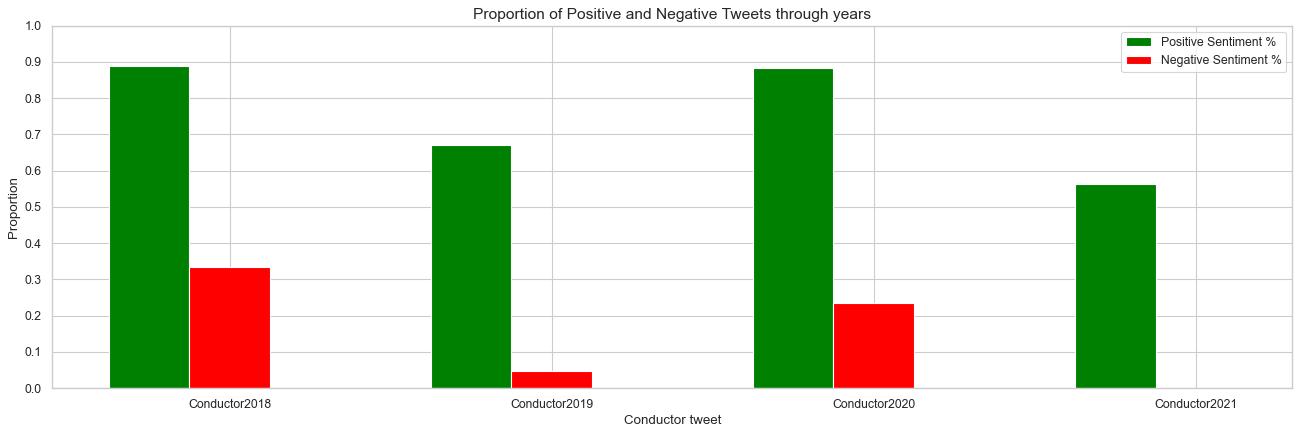

In [184]:
#Plot proportion of pos and neg sentiment
plt.figure(figsize = (20,6), dpi=80)
x = np.arange(len(sentiment_df['Conductor']))
width = 0.25 
plt.bar(x, PositivePercentage, width, color='green', label='Positive Sentiment %')
plt.bar(x + width, NegativePercentage, width, color='red', label='Negative Sentiment %')
plt.xticks(x+width,('Conductor2018', 'Conductor2019','Conductor2020','Conductor2021'))
plt.legend(loc=1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Proportion of Positive and Negative Tweets through years', fontsize=14)
plt.xlabel('Conductor tweet')
plt.ylabel('Proportion')

In [185]:
# Overall, there are more positive tweets than negative tweet about conductors across all the years.

In [186]:
# Among positive tweets, Conductor 2018 got the highest proportion of positive tweets (89%)